In [13]:
# %matplotlib inline
import numpy as np
import scipy as sc
import matplotlib as mpl
import matplotlib.pyplot as plt

from utils import *

mpl.rcParams.update(rcParams)

In [14]:
%%bash
cd .. && make clean && make

In file included from src/Exercice5_students.cpp:7:
src/ConfigFile.tpp:67:8: warning: variable 'out' is used uninitialized whenever 'if' condition is false [-Wsometimes-uninitialized]
   67 |   if ( val != configMap.end() ) {
      |        ^~~~~~~~~~~~~~~~~~~~~~
src/Exercice5_students.cpp:160:33: note: in instantiation of function template specialization 'ConfigFile::get<double>' requested here
  160 |         const double tfin = configFile.get<double>("tfin");
      |                                        ^
src/ConfigFile.tpp:74:10: note: uninitialized use occurs here
   74 |   return out;
      |          ^~~
src/ConfigFile.tpp:67:3: note: remove the 'if' if its condition is always true
   67 |   if ( val != configMap.end() ) {
      |   ^~~~~~~~~~~~~~~~~~~~~~~~~~~~~
   68 |     std::istringstream iss(val->second);
   69 |     iss >> out;
   70 |     std::cout << "\t" << key << "=" << out << std::endl;
   71 |   }else{
      |    ~~~~~
   72 |     std::cerr << "[ConfigFile] Le para

In [15]:
config_name = 'corail1'
conf = load_conf(config_name)

In [16]:
# params, data_x, data_v, data_f
params, x, vitesse, f, h0 = run_with_params(
    config_name,
    [{}]
    # [{'tfin': 10}]
    # gen_variations({
    #     'param': [...],
    # })
)[0]
t = f[:,0]
h = f[:,1:]

[ConfigFile] Ligne sans '=' : "# Physique :"


Running simulations... Done 1/1


# Plots!

## a)

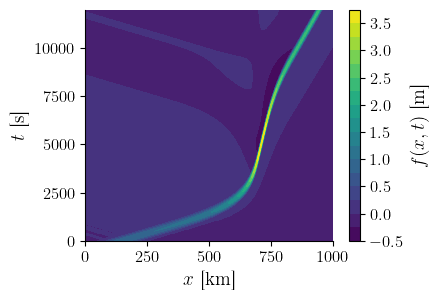

In [29]:
%matplotlib inline

X, Y = np.meshgrid(x/1e3, t)
plt.contourf(X, Y, h, cmap=plt.get_cmap('viridis'), levels=16)
plt.colorbar().set_label(r'$f(x,t)$ [m]')
plt.xlabel(r'$x$ [km]')
plt.ylabel(r'$t$ [s]')
plt.savefig(export_path + 'corail_eq1_mouvement_vague.png')

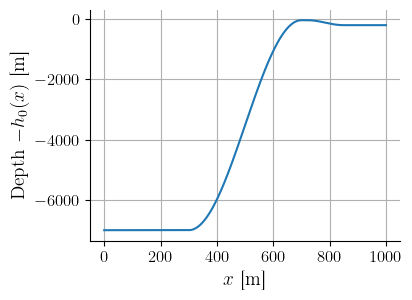

In [30]:
plt.plot(x/1e3, -h0)
plt.xlabel(r'$x$ [m]')
plt.ylabel(r'Depth $-h_0(x)$ [m]')
plt.grid()
plt.savefig(export_path + 'corail_eq1_depth.pdf')

In [19]:
# Do your stuff here pwease
# %matplotlib qt
# import matplotlib.animation as mpla

# plt.figure(figsize=(8, 8))

# plt.fill_between(x, -h0, -conf['hL'], color='xkcd:sand')
# line, = plt.plot(x, f[0,1:], 'x-', markersize=5)
# size = f.shape[0]

# def animate(i) -> Any:
#     idx = i % size
#     line.set_data(x, f[idx,1:])

# anim = mpla.FuncAnimation(plt.gcf(), animate, interval=20, cache_frame_data=True, frames=size)

# plt.xlabel(r'$x$ [m]')
# plt.ylabel(r'$y$ [m]')
# plt.ylim(-50, 20)
# plt.grid()
# anim.save('yeet.gif')

## b)

In [20]:
%matplotlib inline
idx_x_max = np.argmax(h, axis=1)
sel_x = x[idx_x_max]

actual_t = np.copy(t)
amplitudes = np.zeros(len(t))
for i in range(1, len(t)-1):
    coefs = np.polyfit(t[i-1:i+2], h[i-1:i+2, idx_x_max[i]], 2)
    fitfunc = np.poly1d(coefs)
    res = sc.optimize.minimize(lambda t: -fitfunc(t), 0, options={'disp': False})
    actual_t[i] = res.x[0]
    amplitudes[i] = -res.fun
amplitudes[0] = amplitudes[1]
amplitudes[-1] = amplitudes[-2]

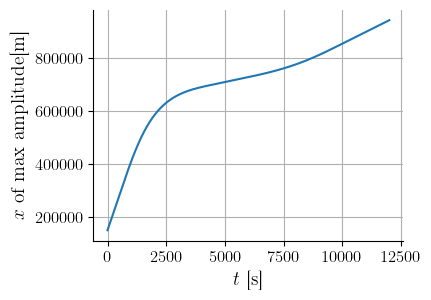

In [21]:
plt.plot(actual_t, x[idx_x_max])
plt.xlabel(r'$t$ [s]')
plt.ylabel(r'$x$ of max amplitude[m]')
plt.grid()

3.5794508286012388 2.3034534229573183


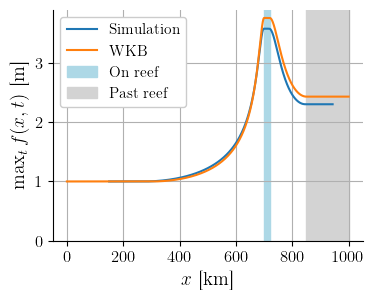

In [27]:
print(np.max(amplitudes), amplitudes[-1])
plt.plot(x[idx_x_max]/1e3, amplitudes, label='Simulation')
plt.plot(x/1e3, conf['A'] * (h0/conf['hL'])**(-1/4), label='WKB')
plt.fill_between([conf['xb']/1e3, conf['xc']/1e3], -1, 4, color='lightblue', label='On reef')
plt.fill_between([conf['xd']/1e3, conf['xR']/1e3], -1, 4, color='lightgrey', label='Past reef')
# plt.axvline(conf['xb'])
# plt.axvline(conf['xc'])
# plt.axvline(conf['xd'])
# plt.axvline(conf['xR'])
plt.xlabel(r'$x$ [km]')
plt.ylabel(r'$\max_t f(x,t)$ [m]')
plt.ylim(0, 3.9)
plt.legend(framealpha=1)
plt.grid()
plt.savefig(export_path + 'corail_eq1_amplitude_wkb.pdf')

## c)

18.47029977794208 261.5269159858702 42.937546896504465


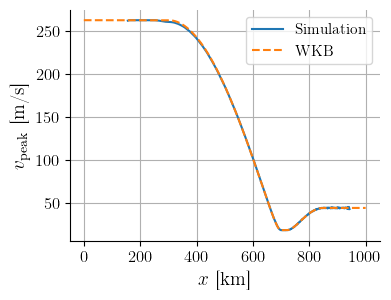

In [14]:
k = 1
vcalc = (sel_x[2*k:] - sel_x[:-2*k]) / (actual_t[2*k:] - actual_t[:-2*k])
print(np.min(vcalc), vcalc[0], vcalc[-1])
plt.plot(x[idx_x_max][k:-k]/1e3, vcalc, label='Simulation')
vth = np.sqrt(9.81 * h0)
plt.plot(x/1e3, vth, '--', label='WKB')
# plt.plot(x/1e3, np.sqrt(vitesse), '--', label='Vitesse initiale')
plt.xlabel(r'$x$ [km]')
plt.ylabel(r'$v_\textrm{peak}$ [m/s]')
plt.legend()
plt.grid()
plt.savefig(export_path + 'corail_eq1_vitesse_wkb.pdf')